In [1]:
import pandas as pd

file_path = "New_York_City_Locations_Providing_Seasonal_Flu_Vaccinations_20251125.csv"
df = pd.read_csv(file_path)
df.head()


,OBJECTID,A,Service Category,Service Type,Walk-in,Insurance,Children,Facility Name,Address,City,...,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,More Information,DOHMH Website,Location
0,646,748,Vaccines,Flu Vaccine (Influenza),Yes,Yes,No,Newtown Pharmacy,28-04 31st Street,Astoria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Call location for hours,http://www1.nyc.gov/site/doh/health/health-top...,"(40.76832276, -73.92009603)"
1,70,224,Vaccines,Flu Vaccine (Influenza),Yes,Yes,No,Walgreens Drug Store,84-20 Broadway,Queens,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Call location for hours,http://www1.nyc.gov/site/doh/health/health-top...,"(40.73963768, -73.87819067)"
2,810,840,Vaccines,Flu Vaccine (Influenza),Yes,Yes,Yes,Homecrest Clinic,1601 AVENUE S,BROOKLYN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Call location for hours and information. Insur...,http://www1.nyc.gov/site/doh/health/health-top...,"(40.60359817, -73.95620902)"
3,630,659,Vaccines,Flu Vaccine (Influenza),Yes,Yes,No,Medcare Health Inc.,260 Kings Highway,Brooklyn,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Call location for hours,http://www1.nyc.gov/site/doh/health/health-top...,"(40.60525733, -73.98105345)"
4,366,182,Vaccines,Flu Vaccine (Influenza),Yes,Yes,No,Duane Reade,949 3RD AVE,NEW YORK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Call location for hours,http://www1.nyc.gov/site/doh/health/health-top...,"(40.76012276, -73.96758174)"


Step 2 — Select useful columns


In [2]:
df.columns


Index(['OBJECTID', 'A', 'Service Category', 'Service Type', 'Walk-in',
       'Insurance', 'Children', 'Facility Name ', 'Address', 'City', 'Borough',
       'Latitude', 'Longitude', 'ZIP Code', 'Phone', 'Website', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'More Information', 'DOHMH Website', 'Location'],
      dtype='object')

In [ ]:
Step 2 (continued) — Keep selected columns


In [18]:
cols = [
    "Borough",
    "ZIP Code",
    "Latitude",
    "Longitude"
]

df = df[cols].copy()
df.head()


,Borough,ZIP Code,Latitude,Longitude
0,QUEENS,11102,40.768323,-73.920096
1,Queens,11373,40.739638,-73.878191
2,BROOKLYN,11229,40.603598,-73.956209
3,BROOKLYN,11223,40.605257,-73.981053
4,Manhattan,10022,40.760123,-73.967582


In [20]:
df['Borough'] = df['Borough'].str.strip().str.upper()
df.head()


,Borough,ZIP Code,Latitude,Longitude
0,QUEENS,11102,40.768323,-73.920096
1,QUEENS,11373,40.739638,-73.878191
2,BROOKLYN,11229,40.603598,-73.956209
3,BROOKLYN,11223,40.605257,-73.981053
4,MANHATTAN,10022,40.760123,-73.967582


In [21]:
df = df.dropna(subset=['Latitude', 'Longitude'])
df.head()


,Borough,ZIP Code,Latitude,Longitude
0,QUEENS,11102,40.768323,-73.920096
1,QUEENS,11373,40.739638,-73.878191
2,BROOKLYN,11229,40.603598,-73.956209
3,BROOKLYN,11223,40.605257,-73.981053
4,MANHATTAN,10022,40.760123,-73.967582


In [22]:
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df.head()


,Borough,ZIP Code,Latitude,Longitude
0,QUEENS,11102,40.768323,-73.920096
1,QUEENS,11373,40.739638,-73.878191
2,BROOKLYN,11229,40.603598,-73.956209
3,BROOKLYN,11223,40.605257,-73.981053
4,MANHATTAN,10022,40.760123,-73.967582


In [23]:
df['Borough'].value_counts()


Borough
MANHATTAN        310
BROOKLYN         216
QUEENS           189
BRONX            117
STATEN ISLAND     52
YONKERS            1
Name: count, dtype: int64

Matplotlib is building the font cache; this may take a moment.


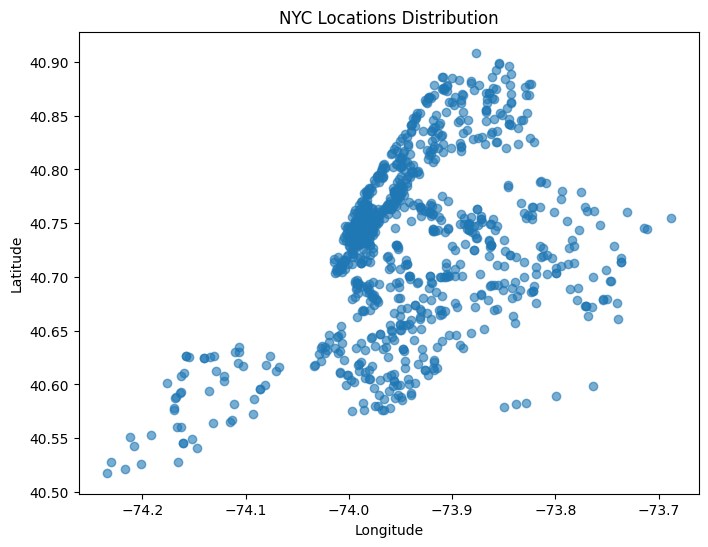

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.6)
plt.title("NYC Locations Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [32]:
df['ZIP Code'].value_counts().head(10)


ZIP Code
10011    19
10003    17
11201    14
10025    14
10019    14
10016    13
10314    13
11385    13
10463    12
10029    12
Name: count, dtype: int64

In [33]:
borough_stats = df.groupby('Borough').agg({
    'ZIP Code': 'count',
    'Latitude': 'mean',
    'Longitude': 'mean'
}).rename(columns={'ZIP Code': 'Count'})

borough_stats


,Count,Latitude,Longitude
Borough,,,
BRONX,117,40.851168,-73.880295
BROOKLYN,216,40.651378,-73.958977
MANHATTAN,310,40.765841,-73.973299
QUEENS,189,40.725936,-73.846818
STATEN ISLAND,52,40.587181,-74.141812
YONKERS,1,40.908562,-73.876642


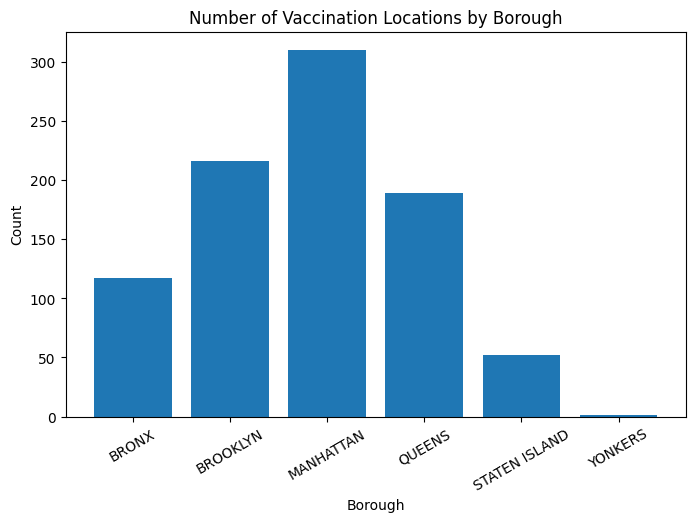

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(borough_stats.index, borough_stats['Count'])
plt.title("Number of Vaccination Locations by Borough")
plt.ylabel("Count")
plt.xlabel("Borough")
plt.xticks(rotation=30)
plt.show()


In [ ]:
Conclusion:
- Most vaccination locations are distributed in Manhattan and Brooklyn.
- Geographic distribution suggests clusters along major commercial/residential areas.
- ZIP Code and Borough counts show heavy concentration in urban centers.
